# Image Input Fact-Checking

#### 1) Exiftool
Extract metadata from images and videos (e.g., EXIF data, GPS coordinates, camera model).

In [49]:
!apt-get install -y libimage-exiftool-perl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-zip-perl libmime-charset-perl libsombok3
  libunicode-linebreak-perl
Suggested packages:
  libposix-strptime-perl libencode-hanextra-perl libpod2-base-perl
The following NEW packages will be installed:
  libarchive-zip-perl libimage-exiftool-perl libmime-charset-perl libsombok3
  libunicode-linebreak-perl
0 upgraded, 5 newly installed, 0 to remove and 34 not upgraded.
Need to get 3,964 kB of archives.
After this operation, 23.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-zip-perl all 1.68-1 [90.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libimage-exiftool-perl all 12.40+dfsg-1 [3,717 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmime-charset-perl all 1.012.2-1 [30.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/unive

In [50]:
import subprocess

def extract_metadata(image_path):
    result = subprocess.run(['exiftool', image_path], stdout=subprocess.PIPE)
    return result.stdout.decode('utf-8')

print(extract_metadata('/content/tbs.jpg'))

ExifTool Version Number         : 12.40
File Name                       : tbs.jpg
Directory                       : /content
File Size                       : 6.7 KiB
File Modification Date/Time     : 2025:04:20 00:29:02+00:00
File Access Date/Time           : 2025:04:20 00:29:08+00:00
File Inode Change Date/Time     : 2025:04:20 00:29:02+00:00
File Permissions                : -rw-r--r--
File Type                       : JPEG
File Type Extension             : jpg
MIME Type                       : image/jpeg
JFIF Version                    : 1.01
Resolution Unit                 : None
X Resolution                    : 1
Y Resolution                    : 1
Image Width                     : 289
Image Height                    : 174
Encoding Process                : Baseline DCT, Huffman coding
Bits Per Sample                 : 8
Color Components                : 3
Y Cb Cr Sub Sampling            : YCbCr4:2:0 (2 2)
Image Size                      : 289x174
Megapixels                      

#### 2) sightengine API to detect an image:
Was AI-generated (GAN, synthetic face, etc.)

Contains nudity, offensive content, or gore

Can optionally support reverse image search using Google Lens

In [51]:
pip install requests

In [52]:
# this example uses requests
import requests
import json

params = {
  'models': '{model}',
  'api_user': '936570926',
  'api_secret': 'wCqNvEaPZHf29Bdf3JYNuzHtGQY6Hf9c'
}
files = {'media': open('/content/tbs.jpg', 'rb')}
r = requests.post('https://api.sightengine.com/1.0/check.json', files=files, data=params)

output = json.loads(r.text)

Saving tbs.jpg to tbs (1).jpg


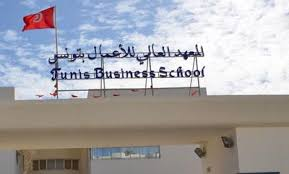

🔎 Analysis Results:

👙 Nudity:
  - Raw: 0.0%
  - Partial: 0.0%
  - Safe: 0.0%

🚫 Offensive content probability: 0.0%

🩸 Gore probability: 0.0%

🧠 AI-generated image? Possibly: unknown



In [53]:
# 📁 Upload file
from google.colab import files
from IPython.display import Image, display
import requests
import json

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 🔍 Sightengine API credentials
params = {
    'models': 'nudity,wad,offensive,gore,face-attributes,face-similarity,generic',
    'api_user': '936570926',  # ⚠️ replace with your real user ID
    'api_secret': 'wCqNvEaPZHf29Bdf3JYNuzHtGQY6Hf9c'  # ⚠️ your API secret
}

# 📤 Send image for analysis
with open(image_path, 'rb') as image_file:
    files_to_send = {'media': image_file}
    response = requests.post(
        'https://api.sightengine.com/1.0/check.json',
        files=files_to_send,
        data=params
    )

# 📦 Parse the result
output = json.loads(response.text)

# 🖼️ Display uploaded image
display(Image(image_path))

# 🧾 Display results
def display_results(result):
    print("🔎 Analysis Results:\n")

    nudity = result.get('nudity', {})
    print(f"👙 Nudity:")
    print(f"  - Raw: {nudity.get('raw', 0) * 100:.1f}%")
    print(f"  - Partial: {nudity.get('partial', 0) * 100:.1f}%")
    print(f"  - Safe: {nudity.get('safe', 0) * 100:.1f}%\n")

    offensive = result.get('offensive', {})
    print(f"🚫 Offensive content probability: {offensive.get('prob', 0) * 100:.1f}%\n")

    gore = result.get('gore', {})
    print(f"🩸 Gore probability: {gore.get('prob', 0) * 100:.1f}%\n")

    generic = result.get('generic', {})
    is_fake = generic.get('fake', {}).get('value', 'unknown')
    print(f"🧠 AI-generated image? Possibly: {is_fake}\n")

# ✅ Show analysis
display_results(output)

####  3) Reverse Image Search

Saving tbs.jpg to tbs (4).jpg


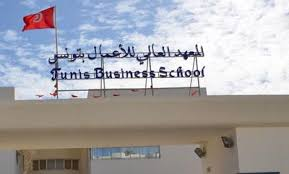

In [27]:
from google.colab import files
from IPython.display import display, HTML, Image

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
display(Image(image_path))

# Step 2: Prompt user with a Google Reverse Image Search tool
html_code = f"""
<h3>🔁 Drag & Drop Reverse Image Search (Google)</h3>
<ol>
  <li>Go to <a href="https://images.google.com/" target="_blank">https://images.google.com</a></li>
  <li>Drag the image <b>{image_path}</b> into the search box</li>
</ol>
"""

display(HTML(html_code))

# Video fact-checking

In [19]:
pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.8 MB/s eta 0:00:00


In [20]:
import yt_dlp
from textblob import TextBlob
import requests

def fetch_video_metadata(url):
    # yt-dlp options for video metadata extraction
    ydl_opts = {
        'quiet': True,  # Disable unnecessary output
        'extract_flat': True,  # Only extract metadata (no download)
    }

    # Extract video metadata
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        try:
            info_dict = ydl.extract_info(url, download=False)
            video_info = {
                "title": info_dict.get("title", "N/A"),
                "uploader": info_dict.get("uploader", "N/A"),
                "upload_date": info_dict.get("upload_date", "N/A"),
                "views": info_dict.get("view_count", "N/A"),
                "description": info_dict.get("description", "N/A"),
            }
            return video_info
        except Exception as e:
            print(f"Error fetching video metadata: {e}")
            return None

def score_threat(text):
    # Simple threat score based on sentiment and keywords
    sentiment = TextBlob(text).sentiment.polarity
    score = 0
    if sentiment < -0.2:
        score += 2
    if any(term in text.lower() for term in ["hoax", "fake", "scam", "false"]):
        score += 3
    return score

def check_fact_checking_keywords(description):
    # Simple check for fact-checking keywords
    keywords = ["hoax", "fake news", "false claim", "disinformation"]
    return any(keyword in description.lower() for keyword in keywords)

def fact_check_video(url):
    video_metadata = fetch_video_metadata(url)

    if not video_metadata:
        print("Could not fetch video metadata.")
        return

    print(f"Video Title: {video_metadata['title']}")
    print(f"Uploader: {video_metadata['uploader']}")
    print(f"Upload Date: {video_metadata['upload_date']}")
    print(f"Views: {video_metadata['views']}")
    print(f"Description: {video_metadata['description']}")

    # Fact-checking based on video description
    description = video_metadata["description"]
    threat_score = score_threat(description)
    print(f"Threat Score: {threat_score}")

    # Check if video contains any fact-checking keywords
    if check_fact_checking_keywords(description):
        print("Fact-checking keywords found in the description.")
    else:
        print("No fact-checking keywords found in the description.")

    return {
        "metadata": video_metadata,
        "threat_score": threat_score,
    }

if __name__ == "__main__":
    video_url = input("Enter the video URL for fact-checking: ").strip()
    fact_check_result = fact_check_video(video_url)
    print("Fact-checking result:", fact_check_result)

Enter the video URL for fact-checking: https://www.youtube.com/watch?v=zvQ4FdXhb3Q
Video Title: هل مهم اتعلم الـDOM في الجافاسكريبت ؟
Uploader: Yehia Tech
Upload Date: 20230831
Views: 37574
Description: ---
خارطة تعلم الفرونت اند Frontend Roadmap
https://youtu.be/ROjN0bSKwIc
---
ازاي تبدأ كمبرمج Freelance ؟
https://youtu.be/pJuAbjIVOWE
---
كورس الJavaScript كامل على Node.js
https://youtube.com/playlist?list=PL8q8h6vqfkSVRNnlbUk-O9JJ0c9B7mqCp
---

لو بتدور تبدأ منين في البرمجة فشوف الPlaylist اللي بتمشي معاك في منهجية البرمجة من الأول
#####
منهجية - مراحل تعلم البرمجة
https://www.youtube.com/watch?v=LGY-Keww1Ac
#####

---
فيديو ملخص الجافاسكريبت في 15 دقيقة JavaScript in 15 mins.
https://youtu.be/WuzcWpnEZYg
---

صفحة الانستجرام
https://www.instagram.com/yehia.tech/

متنسوش تعملوا Like وSubscribe.

===
أنا يحيى العربي مهندس برمجيات شغال بقالي أكتر من 8 سنين في المجال. هدفي في الفيديوهات اللي بنزلها اني انشر الوعي البرمجي وانقلكم خبرتي وتجاربي في السوق عشان تستفيدوا منها ومتككرروش الاخطا

In [3]:
# STEP 1: Install dependencies (compatible versions)
!pip install --upgrade yt-dlp opencv-python-headless ffmpeg-python tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully unin

In [4]:
# STEP 2: Download NSFW model and clone repo
!rm -rf nsfw_model
!git clone https://github.com/GantMan/nsfw_model.git
!wget https://github.com/GantMan/nsfw_model/releases/download/v1.0.0_mobilenet_v2/nsfw_model.tflite -O nsfw_model.tflite

Cloning into 'nsfw_model'...
remote: Enumerating objects: 487, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 487 (delta 90), reused 84 (delta 84), pack-reused 358 (from 1)
Receiving objects: 100% (487/487), 467.21 KiB | 1.66 MiB/s, done.
Resolving deltas: 100% (248/248), done.
--2025-04-19 22:30:09--  https://github.com/GantMan/nsfw_model/releases/download/v1.0.0_mobilenet_v2/nsfw_model.tflite
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-19 22:30:10 ERROR 404: Not Found.



In [5]:
# STEP 3: Input YouTube URL and download video
import os

youtube_url = input("Paste the YouTube video URL here: ").strip()
os.makedirs("videos", exist_ok=True)

!yt-dlp -o "videos/video.%(ext)s" "{youtube_url}"

# Auto-detect downloaded filename
import glob
video_path = glob.glob("videos/video.*")[0]
print(f"✅ Downloaded video: {video_path}")

Paste the YouTube video URL here: https://www.youtube.com/watch?v=mspEJzb8LC4
[youtube] Extracting URL: https://www.youtube.com/watch?v=mspEJzb8LC4
[youtube] mspEJzb8LC4: Downloading webpage
[youtube] mspEJzb8LC4: Downloading tv client config
[youtube] mspEJzb8LC4: Downloading player 9a279502-main
[youtube] mspEJzb8LC4: Downloading tv player API JSON
[youtube] mspEJzb8LC4: Downloading ios player API JSON
[youtube] mspEJzb8LC4: Downloading m3u8 information
[info] mspEJzb8LC4: Downloading 1 format(s): 248+251
[download] Destination: videos/video.f248.webm
[download] 100% of   21.26MiB in 00:00:01 at 15.47MiB/s
[download] Destination: videos/video.f251.webm
[download] 100% of    6.85MiB in 00:00:00 at 30.99MiB/s
[Merger] Merging formats into "videos/video.webm"
Deleting original file videos/video.f248.webm (pass -k to keep)
Deleting original file videos/video.f251.webm (pass -k to keep)
✅ Downloaded video: videos/video.webm


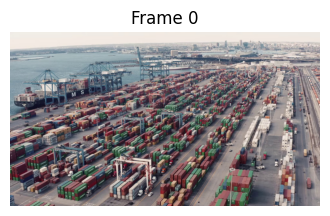

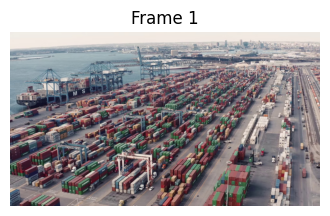

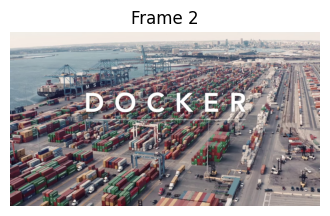

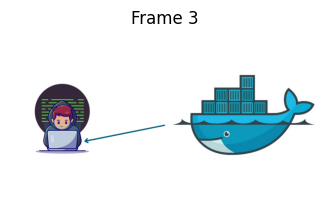

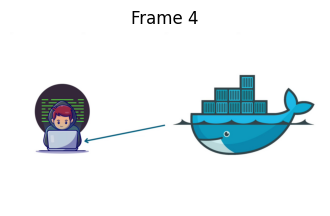

In [8]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

# Get list of all extracted frames (sorted)
frame_files = sorted(glob.glob("frames/frame_*.jpg"))

# Display the first 5 frames
for i, frame_file in enumerate(frame_files[:5]):
    img = Image.open(frame_file)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Frame {i}")
    plt.axis('off')
    plt.show()

In [11]:
import glob
import requests
import json
from collections import defaultdict
from PIL import Image
from IPython.display import Image as IPImage, display

# Sightengine API credentials
params = {
    'models': 'nudity,wad,offensive,gore,face-attributes,generic',  # Removed 'face-similarity'
    'api_user': '936570926',
    'api_secret': 'wCqNvEaPZHf29Bdf3JYNuzHtGQY6Hf9c'
}

api_url = 'https://api.sightengine.com/1.0/check.json'
frame_files = sorted(glob.glob("frames/frame_*.jpg"))

summary = defaultdict(float)
detailed_issues = []

def analyze_frame(frame_path):
    with open(frame_path, 'rb') as image_file:
        files_to_send = {'media': image_file}
        response = requests.post(api_url, files=files_to_send, data=params)
        result = response.json()

    if response.status_code != 200 or result.get("status") != "success":
        print(f"❌ Error analyzing {frame_path}: {result}")
        return None

    # Optional: Display frame if needed
    # display(IPImage(frame_path))

    return result

def extract_and_aggregate(result, index):
    # Nudity
    nudity = result.get('nudity', {})
    if nudity.get('raw', 0) > 0.5:
        summary['nudity_raw'] += 1
        detailed_issues.append((index, 'nudity_raw'))
    if nudity.get('partial', 0) > 0.5:
        summary['nudity_partial'] += 1
        detailed_issues.append((index, 'nudity_partial'))

    # Offensive content
    if result.get('offensive', {}).get('prob', 0) > 0.5:
        summary['offensive'] += 1
        detailed_issues.append((index, 'offensive'))

    # Gore
    if result.get('gore', {}).get('prob', 0) > 0.5:
        summary['gore'] += 1
        detailed_issues.append((index, 'gore'))

    # AI-generated check (using tags like "rendered", "fake", etc.)
    for concept in result.get("generic", {}).get("tags", []):
        if concept["name"] in ["rendered", "fake", "generated"] and concept["confidence"] > 0.5:
            summary["ai_generated"] += 1
            detailed_issues.append((index, f"ai_generated: {concept['name']}"))

# Analyze frames
print(f"🔍 Processing {len(frame_files)} frames...")
for i, frame_path in enumerate(frame_files[:100]):  # Limit to 100 for API rate safety
    result = analyze_frame(frame_path)
    if result:
        extract_and_aggregate(result, i)
    if i % 10 == 0:
        print(f"✅ Processed {i+1} frames")

# Summary
print("\n📊 Final Summary:")
for k, v in summary.items():
    print(f"- {k.replace('_', ' ').capitalize()}: {v} frame(s)")

print("\n⚠️ Sample detailed issues:")
for i, issue in detailed_issues[:10]:
    print(f"  - Frame {i}: {issue}")

if len(detailed_issues) == 0:
    print("✅ No violations detected.")

🔍 Processing 505 frames...
❌ Error analyzing frames/frame_0.jpg: {'status': 'failure', 'request': {'id': 'req_ijqaxd9TuhZUe6fuQAIqx', 'timestamp': 1745102556.199588, 'operations': 0}, 'error': {'type': 'argument_error', 'code': 50, 'message': "Unknown model 'generic'"}}
✅ Processed 1 frames
❌ Error analyzing frames/frame_1.jpg: {'status': 'failure', 'request': {'id': 'req_ijqaFa0PeAXavVN30egeL', 'timestamp': 1745102557.868615, 'operations': 0}, 'error': {'type': 'argument_error', 'code': 50, 'message': "Unknown model 'generic'"}}
❌ Error analyzing frames/frame_10.jpg: {'status': 'failure', 'request': {'id': 'req_ijqatosTo4t3ZYVP5WpZ0', 'timestamp': 1745102559.207408, 'operations': 0}, 'error': {'type': 'argument_error', 'code': 50, 'message': "Unknown model 'generic'"}}
❌ Error analyzing frames/frame_100.jpg: {'status': 'failure', 'request': {'id': 'req_ijqaXn36dhQ3PtmsyVWs9', 'timestamp': 1745102560.228009, 'operations': 0}, 'error': {'type': 'argument_error', 'code': 50, 'message': "

# Article Fact-Checking

In [83]:
!pip install scikit-learn pandas joblib tldextract

In [85]:
import pandas as pd
import re
import tldextract
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from joblib import dump, load

# ✅ STEP 2: Prepare training data (for fake news classifier - basic demo)
data = {
    'text': [
        'Donald Trump says he won the 2020 election.',
        'NASA confirms water on the moon.',
        'Aliens landed in Times Square.',
        'Pfizer vaccine approved by FDA.',
        'Bill Gates says vaccines contain microchips.',
        'Reuters reports increase in global inflation.'
    ],
    'label': [1, 0, 1, 0, 1, 0]  # 1 = fake, 0 = real
}
df = pd.DataFrame(data)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']
model = LogisticRegression()
model.fit(X, y)

# ✅ STEP 3: Get user input
print("📝 Paste the full article content (or claim):\n")
user_text = input()

# ✅ STEP 4: Predict fake or real
X_input = vectorizer.transform([user_text])
prediction = model.predict(X_input)

result = "✅ This article/claim appears to be REAL." if prediction[0] == 0 else "❌ This article/claim may be FAKE or misleading."
print(result)

# ✅ STEP 5: Try to extract source name (very basic approach)
def extract_source_name(text):
    # Example: look for mentions like (Reuters), (BBC), etc.
    known_sources = ["Reuters", "BBC", "CNN", "Al Jazeera", "Fox News", "NY Times", "AP", "Bloomberg"]
    for source in known_sources:
        if source.lower() in text.lower():
            return source
    return "Unknown"

source_name = extract_source_name(user_text)

# ✅ STEP 6: Check reputation from known list
source_reputation = {
    "Reuters": {"reliable": True, "bias": "center", "country": "UK"},
    "BBC": {"reliable": True, "bias": "center-left", "country": "UK"},
    "CNN": {"reliable": True, "bias": "left", "country": "USA"},
    "Fox News": {"reliable": False, "bias": "right", "country": "USA"},
    "Al Jazeera": {"reliable": True, "bias": "center", "country": "Qatar"},
    "NY Times": {"reliable": True, "bias": "left", "country": "USA"},
    "AP": {"reliable": True, "bias": "center", "country": "USA"},
    "Bloomberg": {"reliable": True, "bias": "center", "country": "USA"}
}

print(f"\n🔍 Detected source: {source_name}")

if source_name in source_reputation:
    info = source_reputation[source_name]
    print(f"🌐 Source Info:\n  - Country: {info['country']}\n  - Bias: {info['bias']}\n  - Reliable: {'✅ Yes' if info['reliable'] else '❌ No'}")
else:
    print("ℹ️ Source not found in reputation list.")

📝 Paste the full article content (or claim):

Italy clears UniCredit's bid for Banco BPM with prescriptions  Italy wants UniCredit to speed up exit from Russia Government reviewed deal under 'golden power' legislation UniCredit says to take time to assess impact UniCredit also built stakes in Generali, Commerzbank ROME, April 19 (Reuters) - Italy has cleared with conditions UniCredit's (CRDI.MI), opens new tab takeover bid for rival Banco BPM (BAMI.MI), opens new tab, with sources saying a speedier exit from Russia is among demands set by Rome for the bank led by CEO Andrea Orcel. UniCredit's presence in Russia is a bone of contention also with the European Central Bank, which last year ordered the Italian lender to hasten its disentanglement. The Reuters Tariff Watch newsletter is your daily guide to the latest global trade and tariff news. Sign up here. UniCredit said late on Friday it would take time to assess the implications of the government's decision, including on the BPM deal,